# Image data acquisition

### Importing all libraries

In [ ]:
from google.colab import drive
from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np 
import os
import matplotlib.pyplot as plt
import imageio
import random
import matplotlib.image as mpimg
import cv2

### Connecting to GoogleDrive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_WIDTH = 80
IMG_HEIGHT = 80

apple_img_folder = r'/content/drive/MyDrive/ml_dl/immagini-5/immagini-5/Apple'
path_img = r'/content/drive/MyDrive/ml_dl/immagini-5/immagini-5'

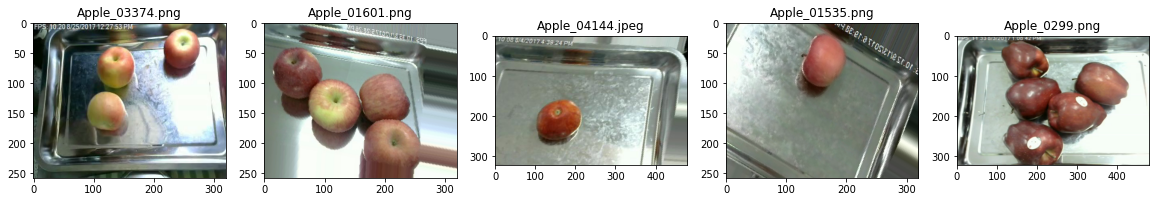

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(apple_img_folder))
    image_path = os.path.join(apple_img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
def create_dataset(img_folder):
    img_data_array = []
    class_name = []
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1,  file)
            image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name 

### Creating dataset

In [ ]:
img_data, class_name = create_dataset(path_img)

In [ ]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Apple': 0,
 'Carambola': 1,
 'Mango': 2,
 'Muskmelon': 3,
 'Orange': 4,
 'Peach': 5,
 'Pomegranate': 6}

In [ ]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

### Creating dataset (NumPy array) 

In [ ]:
X = np.array(img_data, np.float32)

In [ ]:
y = np.array(list(map(int,target_val)), np.float32)

In [ ]:
X.shape

(19745, 80, 80, 3)

In [ ]:
X = X.reshape(X.shape[0], (X[0].shape[0]*X[0].shape[1]*X[0].shape[2]))

In [ ]:
X.shape

(19745, 19200)

### Train - validation - test split 

In [ ]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=0.6, random_state=43) # 60% training and 40% validation + test
X_validation, X_test, y_validation, y_test = train_test_split(X_tmp, y_tmp, train_size=0.6, random_state=43) # 60% validation and 40% test

([<matplotlib.patches.Wedge at 0x7fb71b9f5160>,
 [Text(0.7646625878296317, 0.7907535183441747, 'Apple'),
  Text(-0.3937553804494262, 1.0271108510609397, 'Carambola'),
  Text(-1.07484604371818, 0.2338931001619689, 'Mango'),
  Text(-0.7867889072133226, -0.7687413189663125, 'Muskmelon'),
  Text(0.010646778331101833, -1.0999484742983048, 'Orange'),
  Text(0.8659190997268262, -0.6783687144380134, 'Peach'),
  Text(1.091790687609099, -0.1341383407160342, 'Pomegranate')],
 [Text(0.41708868427070817, 0.43132010091500433, '25.5%'),
  Text(-0.21477566206332335, 0.5602422823968761, '10.6%'),
  Text(-0.5862796602099162, 0.1275780546338012, '20.9%'),
  Text(-0.4291575857527214, -0.41931344670889764, '10.5%'),
  Text(0.005807333635146454, -0.5999718950718026, '15.2%'),
  Text(0.4723195089419051, -0.3700192987843709, '13.4%'),
  Text(0.5955221932413267, -0.07316636766329138, '3.9%')])

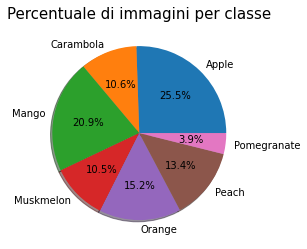

In [ ]:
data = []
label=["Apple", "Carambola", "Mango", "Muskmelon", "Orange", "Peach", "Pomegranate" ]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Percentuale di immagini per classe", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

### Imbalanced dataset, SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
train_set_OS = SMOTE()
X_train, y_train = train_set_OS.fit_resample(X_train, y_train)

([<matplotlib.patches.Wedge at 0x7fb718463fa0>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Apple'),
  Text(0.24477296280441296, 1.0724207181325571, 'Carambola'),
  Text(-0.68583886831644, 0.8600145619153347, 'Mango'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, 'Muskmelon'),
  Text(-0.6858386267552901, -0.8600147545539077, 'Orange'),
  Text(0.24477326402622548, -1.0724206493806185, 'Peach'),
  Text(0.9910658791734962, -0.47727185454211024, 'Pomegranate')],
 [Text(0.5405813155184778, 0.2603302543161511, '14.3%'),
  Text(0.13351252516604342, 0.5849567553450311, '14.3%'),
  Text(-0.3740939281726036, 0.46909885195381884, '14.3%'),
  Text(-0.5999999999999941, -8.426408123908927e-08, '14.3%'),
  Text(-0.3740937964119763, -0.4690989570294042, '14.3%'),
  Text(0.13351268946885025, -0.5849567178439737, '14.3%'),
  Text(0.5405813886400888, -0.26033010247751465, '14.3%')])

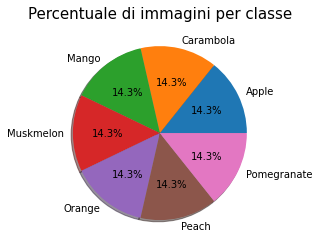

In [ ]:
data = []
label=["Apple", "Carambola", "Mango", "Muskmelon", "Orange", "Peach", "Pomegranate" ]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Percentuale di immagini per classe", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

### Saving in a GoogleDrive folder NumPy arrays

In [ ]:
np.save('/content/drive/MyDrive/ml_dl/immagini-5/training_set/X_train.npy', X_train)
np.save('/content/drive/MyDrive/ml_dl/immagini-5/training_set/y_train.npy', y_train)

np.save('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/X_val.npy', X_validation)
np.save('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/y_val.npy', y_validation)

np.save('/content/drive/MyDrive/ml_dl/immagini-5/test_set/X_test.npy', X_test)
np.save('/content/drive/MyDrive/ml_dl/immagini-5/test_set/y_test.npy', y_test)

np.save('/content/drive/MyDrive/ml_dl/immagini-5/dataset/X.npy', X)
np.save('/content/drive/MyDrive/ml_dl/immagini-5/dataset/y.npy', y)